In [9]:
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import math

In [10]:
mat = scipy.io.loadmat('ex7data2.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [11]:
data = mat['X']
column_names = ['x', 'y'] 
data = pd.DataFrame(data, columns=column_names)

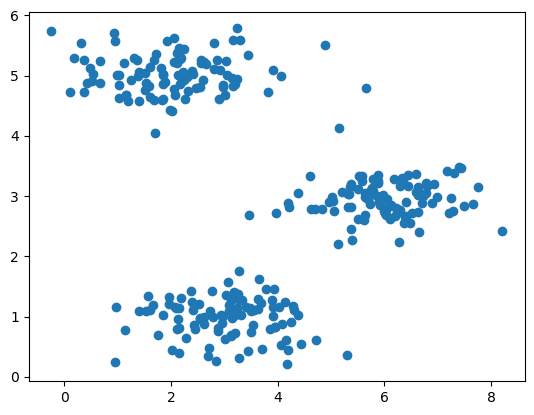

In [12]:
x = data.to_numpy()
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [13]:
def euclidian_distance(p1, p2):
    n = p1.shape[0]
    diff_squared = 0
    for i in range(n):
        diff_squared += (p1[i]-p2[i])**2   
    return math.sqrt(diff_squared)

In [14]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    """
    m,n = X.shape # m = no of samples # n = dimension of the inputs as well as the dimension of all the centroids, in our examples n = 2
    k = centroids.shape[0] # k = no of centroids (or) number of clusters
    idx = np.zeros(m, dtype=int)
    # for each sample in m find the index of the centroid to which its euclidient distamce is minimum
    for i in range(m):
        min_dist = float('inf')
        min_index = 0
        for j in range(k):
            curr_dist = euclidian_distance(X[i], centroids[j])
            if curr_dist < min_dist:
                min_dist = curr_dist
                min_index = j
        idx[i] = min_index
    return idx

In [15]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    assigned_count = np.zeros(K)
    for i in range(m):
        assigned_id = idx[i]
        centroids[assigned_id] = centroids[assigned_id]+X[i]
        assigned_count[assigned_id]+=1
    for i in range(K):
        centroids[i] = centroids[i]/assigned_count[i]
    return centroids   

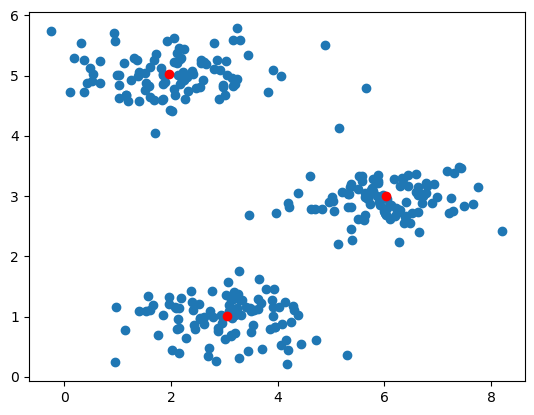

In [17]:
#assigning three random centroids
random_indices = np.random.choice(x.shape[0], size=3, replace=False)
centroids = x[random_indices]


for i in range(50):
    idx = find_closest_centroids(x, centroids)
    centroids = compute_centroids(x,idx,3)

#plot after updation
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r')
plt.show()